# World Happiness Report
### Global Happiness based on measured factors

How does one measure Happiness? This is an age old question that has been wondered by experts for years, yet there is some data that allows us to see definitive factors that show what can contribute to the Overall Happiness of a Nation.  The purpose of this study is attempt to identify what factors have the largest effect on the (Ladder) or also known as the Overall Happiness of a Nation.

First, let's import what we will need to run this study. We will be using a CSV which is where the data comes from and SQLite to construct a database that we will use to manipulate the data. NumPy and Pandas will help form the data while MatPlotLib and Seaborn will be used for visualization.

In [1]:
import os
import sqlite3
import csv

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Now that we have the essientials, let's construct our Database in order of Happiest Countries to Unhappiest. (Ladder) being the measure of Overall Happiness.

In [2]:
conn = sqlite3.connect("World_happiness2019.db")
World_happiness2019 = pd.read_csv('world_happiness_report_2019.csv')
World_happiness2019.to_sql('World_happiness2019', conn, if_exists='replace')

In [3]:
pd.read_sql_query("""
    SELECT * FROM World_happiness2019
    ORDER BY Ladder
    ASC;
""", conn)

,index,Country,Ladder,SD_of_Ladder,Positive_affect,Negative_affect,Social_support,Freedom,Corruption,Generosity,Log_of_GDP_per_capita,Healthy_life_expectancy
0,0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


Looks good, but we can make this cleaner, let's rename some of the columns to make this easier to read and to understand.

In [4]:
World_happiness2019.rename(
    columns={
        'Country':'Country',
        'Ladder': 'Overall Happiness',
        'SD_of_Ladder': 'Standard Deviation of Happiness',
        'Positive_affect': 'Positive Emotion', 
        'Negative_affect': 'Negative Emotion', 
        'Social_support': 'Social Support', 
        'Freedom': 'Freedom', 
        'Corruption': 'Corruption',
        'Generosity': 'Generosity',
        'Log_of_GDP_per_capita': 'GDP Relation to Happiness',
        'Healthy_life_expectancy': 'Healthy Life Expectancy'
    }, 
    inplace=True)

In [5]:
World_happiness2019

,Country,Overall Happiness,Standard Deviation of Happiness,Positive Emotion,Negative Emotion,Social Support,Freedom,Corruption,Generosity,GDP Relation to Happiness,Healthy Life Expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


First let's look at a few graphs that showcase the overall data, and to see the which aspects may weigh heavier on affecting Happiness.

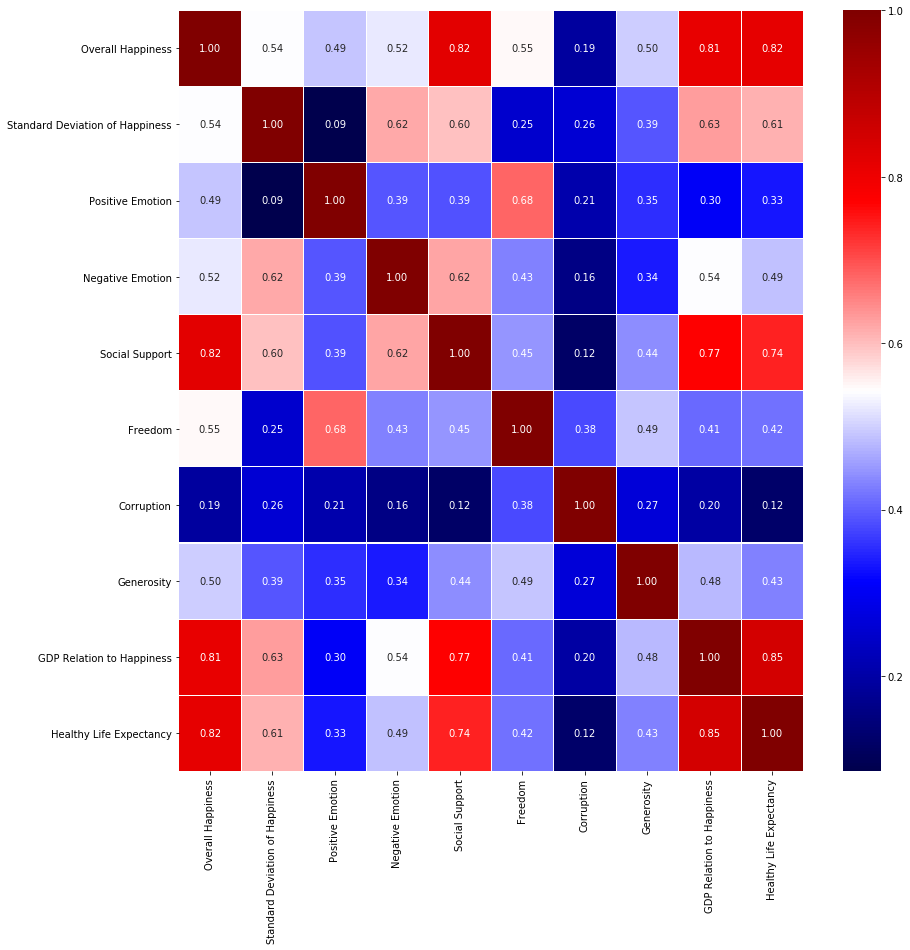

In [6]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(World_happiness2019.corr(),ax=ax,annot=True,linewidth=0.05,fmt='.2f',cmap='seismic')
plt.show()

This data tells us several things, but before that, let's discuss how to read the information above.  The primary factor you want to compare against is Overall Happiness, as Overall Happiness is the measure of how happy people are in thier said countries. The closer to 1 or darker red a factor is, the more it has a STRONG CORREALATION on Overall Happiness. The closer to 0 or darker blue a factor is shows a weaker correalation Overall Happiness.
From this data we can conclude that Healthy Life Expectancy at (0.82), GDP or Wealth of a country at (0.81) and Social Support at (0.82) are the highest factors that contribute to Overall Happiness. Conversly, we can conclude that Corruption at (0.19) is the factor with the largest Negative impact on Overall Happiness. Other factors mostly reside somewhat neutral on the scale, and do not provide a large enough impact to be judged positive or negative.

## Now that we have established some trends, let's look deeper into what some of these mean in more detail.

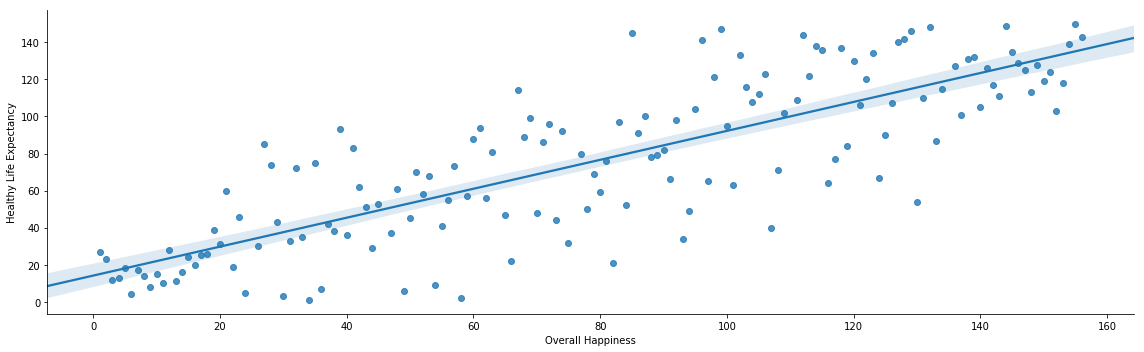

In [7]:
sns.lmplot(x='Overall Happiness',y='Healthy Life Expectancy',data=World_happiness2019, height=5, aspect=3.2)

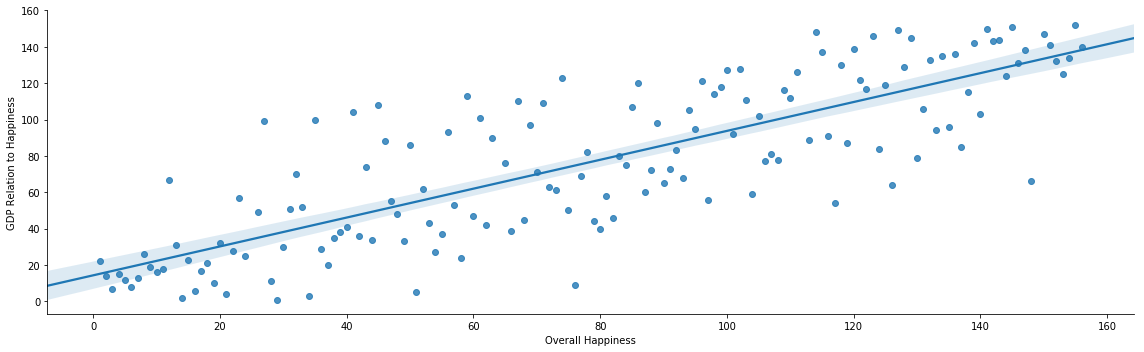

In [8]:
sns.lmplot(x='Overall Happiness',y='GDP Relation to Happiness',data=World_happiness2019, height=5, aspect=3.2)

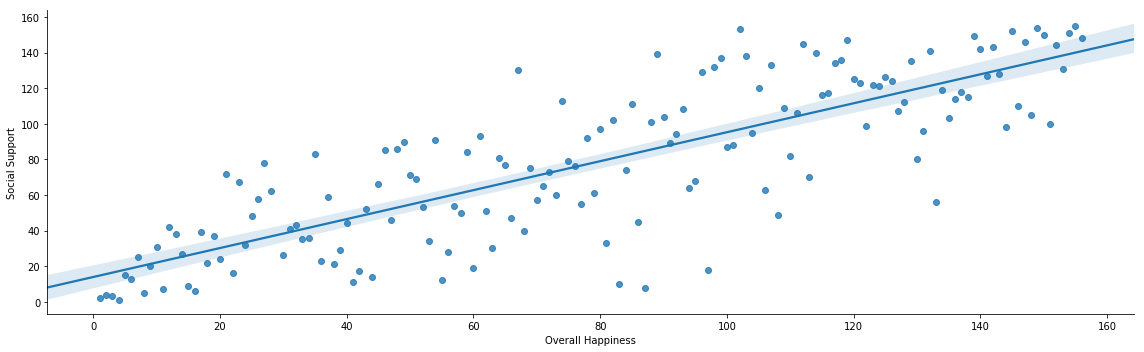

In [9]:
sns.lmplot(x='Overall Happiness',y='Social Support',data=World_happiness2019, height=5, aspect=3.2)

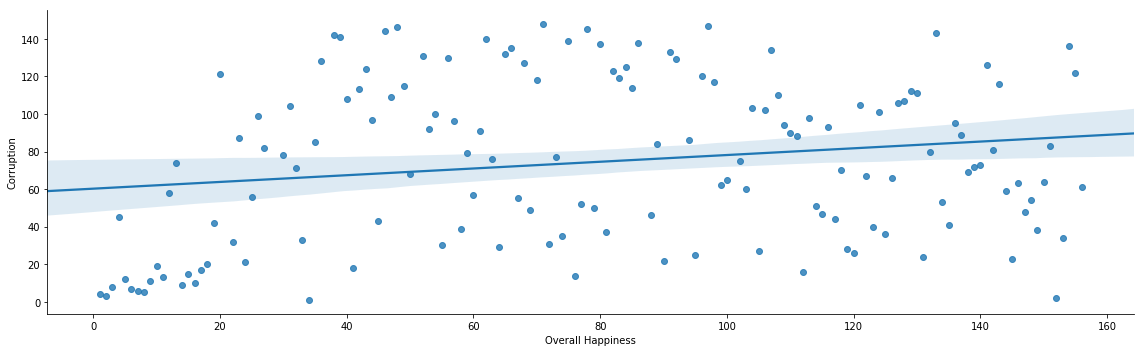

In [10]:
sns.lmplot(x='Overall Happiness',y='Corruption',data=World_happiness2019, height=5, aspect=3.2)

As you can see in the charts above, Healthy Life Expectancy, GDP in Relation to Happiness, and Social Support all have a strong correlation with Overall Happiness, while Corruption shows very little correlation with Overall Happiness.

## Next let's see which countries make up the top 10 in Overall Happiness.

In [11]:
happiest_ten=pd.read_sql_query("""
    SELECT Country, Ladder, Healthy_life_expectancy, Log_of_GDP_per_capita, Social_support, Corruption FROM World_happiness2019
    ASC
    LIMIT 10
""", conn)

In [12]:
happiest_ten.rename(
    columns={
        'Country':'Country',
        'Ladder': 'Overall Happiness',
        'Healthy_life_expectancy': 'Healthy Life Expectancy',
        'Log_of_GDP_per_capita': 'GDP Relation to Happiness',
        'Social_support': 'Social Support',
        'Corruption': 'Corruption'
    }, 
    inplace=True)

In [13]:
happiest_ten

,Country,Overall Happiness,Healthy Life Expectancy,GDP Relation to Happiness,Social Support,Corruption
0,Finland,1,27.0,22.0,2.0,4.0
1,Denmark,2,23.0,14.0,4.0,3.0
2,Norway,3,12.0,7.0,3.0,8.0
3,Iceland,4,13.0,15.0,1.0,45.0
4,Netherlands,5,18.0,12.0,15.0,12.0
5,Switzerland,6,4.0,8.0,13.0,7.0
6,Sweden,7,17.0,13.0,25.0,6.0
7,New Zealand,8,14.0,26.0,5.0,5.0
8,Canada,9,8.0,19.0,20.0,11.0
9,Austria,10,15.0,16.0,31.0,19.0


These are the 10 countries that are considered to have the Highest Overall Happiness level.  Looking at this smaller group, let's see if there is any trends or outliers when comparing against Healthy Life Expectancy, GDP, Social Support and Corruption.

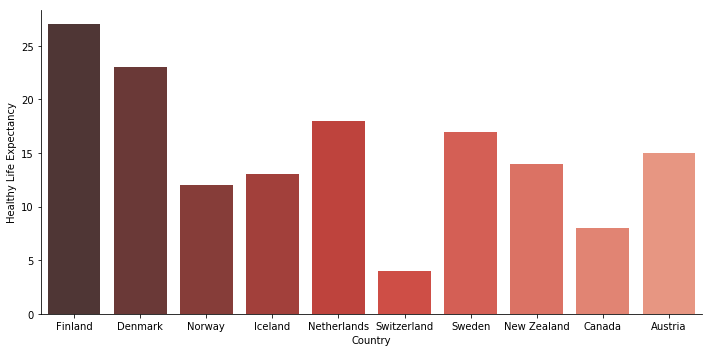

In [14]:
sns.catplot(x="Country", y="Healthy Life Expectancy", kind="bar", palette="Reds_d", data=happiest_ten, height=5, aspect=2);

Most of these Countries rank pretty high on Healthy Life Expectancy, which is not suprising considering the high correalation we found with Life Expectancy and Overall Happiness. The highest here being Switzerland with a Life Expectancy with a score of 4 and lowest being Finland with a score of 27. Considering the scale of the data, this is a relativly tight grouping.

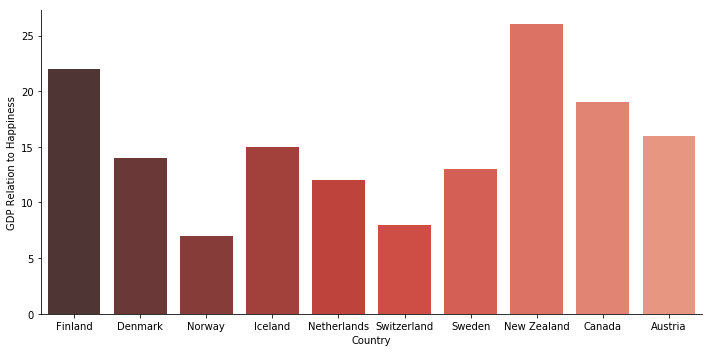

In [15]:
sns.catplot(x="Country", y="GDP Relation to Happiness", kind="bar", palette="Reds_d", data=happiest_ten, height=5, aspect=2);

Once again, all of these Countries rank highly on GDP in Relation to Happiness. As stated before, they all have a high correalation with Overall Happiness. Like Healthy Life Expectancy, this factor also has a tight grouping with the highest score being Norway with a score of 7 and lowest being New Zealand with a score of 26.

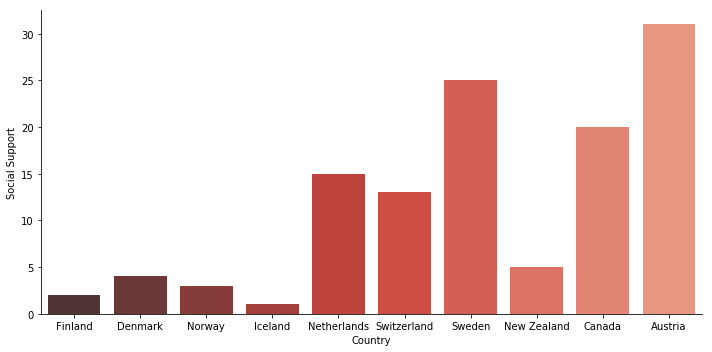

In [16]:
sns.catplot(x="Country", y="Social Support", kind="bar", palette="Reds_d", data=happiest_ten, height=5, aspect=2);

Interestingly enough 5 of 10 of these Countries rank within not only the top 10 in Overall Happiness but also in the top 10 of Social Support. This further shows the strong correalation between Social Support and Overall Happiness. The highest score from this factor is Iceland as a 1, the lowest being Austria with a score of 31.

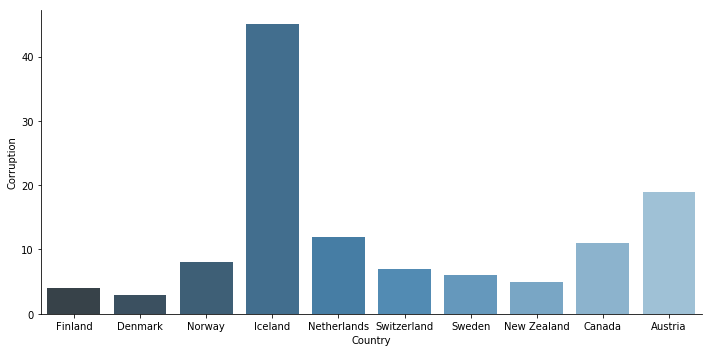

In [17]:
sns.catplot(x="Country", y="Corruption", kind="bar", palette="Blues_d", data=happiest_ten, height=5, aspect=2);

Finally we look at Corruption in the top 10 scorers of Overall Happiness. In this visualization it is important to point out the lower the number or higher the score, the less Corruption contributes to Overall Happiness, or as it is stated in the CSV Data File "The extent to which Perception of Corruption contributes to Happiness Score." We notice that almost all the Countries score under 20 however, Iceland is somewhat of an outlier scoring a 45.

# Conclusion

Overall it should be concluded that the factors that contribute the most or, have the Strongest Correalation with Overall Happiness are Social Support, Healthy Life Expectancy and GDP in Relation to Happiness.